# 1

Read the documentation at https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/appletaste.html.
    

# 2

In [1]:
import pandas as pd
apl_df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/appletaste.csv", index_col=0)
apl_df.head(10)

,aftertaste,panelist,product
1,89,a,937
2,98,a,298
3,108,a,493
4,13,b,937
5,55,b,298
6,104,b,493
7,40,c,937
8,122,c,298
9,148,c,493
10,6,d,937


# 3

In [26]:
import numpy as np
avgat_df = pd.pivot_table(apl_df, values='aftertaste', index='product', aggfunc=np.mean)
avgat_df

,aftertaste
product,
298,68.333333
493,94.066667
649,51.800000
937,30.000000


**AN ALTERNATIVE** way of getting the mean aftertaste scores is to use the dataframe method **groupby**.

In [29]:
avgat_df2 = apl_df.groupby('product').mean()
avgat_df2

,aftertaste
product,
298,68.333333
493,94.066667
649,51.800000
937,30.000000


In [3]:
import matplotlib.pyplot as plt
# Plot the barchart
plt.bar(range(0, 4), height=avgat_df['aftertaste'], tick_label=avgat_df.index)
# Function savefig() must be called before show(); 
# the bbox_inches value 'tight' forces the function to fit exactly everything into the png
plt.savefig('aftertastes.png', format='png', bbox_inches='tight')
plt.show()

<Figure size 640x480 with 1 Axes>

# 4

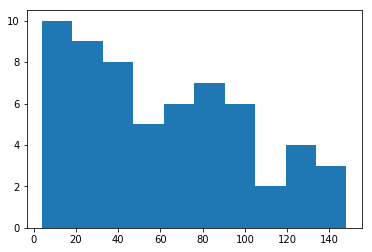

In [4]:
apl_hist = plt.hist(apl_df['aftertaste'])
plt.show()

# 5

We will use Kendall's Tau to calculate the level of relatedness and test it for statistical significance. This metric was chosen because the data are ordinal and numeric. 

In [5]:
# First get the average score given by each panelist
avgat2_df = pd.pivot_table(apl_df, values='aftertaste', index='panelist', aggfunc=np.mean)
avgat2_df

,aftertaste
panelist,
a,98.333333
b,57.333333
c,103.333333
d,73.333333
e,72.000000
f,63.666667
g,38.000000
h,55.333333
i,86.333333


In [6]:
# Import the stats package and apply Kendall's Tau
import scipy.stats as ss
score_arr = avgat2_df['aftertaste']
tau, p = ss.kendalltau(score_arr, range(0, len(score_arr)))
print("tau = " + str(tau))
print("p = " + str(p))

tau = -0.3535632359975612
p = 0.02963670886646476


Interpretation: The calculated Kendall's Tau is negative and low (-0.35). The two-tailed p-value is approximately 0.03, meaning that in about 3% of cases this Tau value would be obtained for entirely unrelated sequences of the same length as ours. At a level of 5% this is significant and the result somewhat surprising.

# 6

In [24]:
f, p = ss.f_oneway(apl_df['aftertaste'][apl_df['product']==937], apl_df['aftertaste'][apl_df['product']==649], apl_df['aftertaste'][apl_df['product']==493], apl_df['aftertaste'][apl_df['product']==298])
print("f-statistic: " + str(f) + "\np-value: " + str(p))

f-statistic: 10.500058524869276
p-value: 1.3986434232472648e-05


**AN ALTERNATIVE** way to call **f_oneway()**:

- the star (\*) operator placed at the beginning of the argument list to f_oneway() allows us to pass in a list comprehension that creates a list of value series
- not storing the values returned by the method into variables results in the interactive mechanism printing out the return values (as these are what the function call evaluates to)

In [25]:
ss.f_oneway(*(apl_df['aftertaste'][apl_df['product'] == product] for product in apl_df['product'].unique()))

F_onewayResult(statistic=10.500058524869278, pvalue=1.398643423247258e-05)

Interpretation: The p value is very low, which means that at any usual confidence levels (e.g. 5% or 1%) the f-statistic value is significant, indicating a difference between the aftertaste scores given to the different sorts of apples.